In [377]:
import pandas as pd
import plotly.express as px
from scipy import stats

In [378]:
df = pd.read_csv('../data/Fluoridation by postcode - Sheet1.csv')

In [379]:
df.dtypes

cartodb_id          int64
melbourne            bool
postcode            int64
id                  int64
fluoride_level     object
water_company      object
townsuburb         object
lat               float64
lon               float64
dtype: object

In [380]:
df['fluoride_level'].unique() 

array(['Fluoridated', 'Not fluoridated', 'Partly fluoridated',
       'Natural fluoride'], dtype=object)

In [381]:
df['melbourne'].unique()

array([False,  True])

In [382]:
df[df.melbourne == True]

,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
1,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000
2,2,True,3040,2,Fluoridated,City West Water,ABERFELDIE,-37.762000,144.901000
7,7,True,3042,7,Fluoridated,City West Water,AIRPORT WEST,-37.724000,144.879000
8,8,True,3021,8,Fluoridated,City West Water,ALBANVALE,-37.746000,144.765000
9,9,True,3206,9,Fluoridated,South East Water,ALBERT PARK,-37.842000,144.950000
...,...,...,...,...,...,...,...,...,...
1048,1049,True,3013,1049,Fluoridated,City West Water,YARRAVILLE,-37.817000,144.890000
1049,1050,True,3013,1050,Fluoridated,City West Water,YARRAVILLE WEST,-37.815066,144.885260
1053,1054,True,3139,1054,Partly fluoridated,Yarra Valley Water,YELLINGBO,-37.810000,145.510000
1055,1056,True,3770,1056,Fluoridated,Yarra Valley Water,YERING,-37.700221,145.358251


In [383]:
fig = px.bar(
    df.groupby(['fluoride_level', 'melbourne']).size().reset_index(name='count'),
    x='fluoride_level',
    y='count',
    color='melbourne',
)


fig.show()

In [384]:
contigency_table = pd.crosstab(df['fluoride_level'], df['melbourne'])
contigency_table

melbourne,False,True
fluoride_level,,
Fluoridated,406,381
Natural fluoride,2,0
Not fluoridated,244,12
Partly fluoridated,4,10


In [385]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, \n\n',f'expected: \n{expected}')

chi2: 164.56534953232273, p: 1.895889619062605e-35, dof: 3, 

 expected: 
[[487.50897073 299.49102927]
 [  1.23890463   0.76109537]
 [158.57979226  97.42020774]
 [  8.67233239   5.32766761]]


In [386]:
if p < 0.05:
    association_result = "There is a significant association between 'melbourne' and 'fluoride_level'."
else:
    association_result = "There is no significant association between 'melbourne' and 'fluoride_level'."

association_result

"There is a significant association between 'melbourne' and 'fluoride_level'."

In [387]:
n_comps_by_suburb = (df.groupby(['townsuburb'])
                      .agg({'water_company': 'count'})
                      .rename(columns={'water_company': 'n_companies'})
                      .sort_values(by='n_companies', ascending=False)
                      .reset_index())

print(n_comps_by_suburb
      .to_markdown())

|      | townsuburb           |   n_companies |
|-----:|:---------------------|--------------:|
|    0 | BELGRAVE             |             2 |
|    1 | MULGRAVE             |             2 |
|    2 | HUNTINGDALE          |             2 |
|    3 | MELBOURNE            |             2 |
|    4 | COBURG               |             2 |
|    5 | ARMADALE             |             2 |
|    6 | OAKLEIGH             |             2 |
|    7 | HUGHESDALE           |             2 |
|    8 | TULLAMARINE          |             2 |
|    9 | UPWEY                |             2 |
|   10 | MALVERN              |             2 |
|   11 | PAKENHAM             |             2 |
|   12 | BAYSWATER            |             2 |
|   13 | NORTH SHORE          |             1 |
|   14 | NORTH WARRANDYTE     |             1 |
|   15 | NUMURKAH             |             1 |
|   16 | NORTHCOTE            |             1 |
|   17 | NOTTING HILL         |             1 |
|   18 | NOWA NOWA            |         

In [388]:
max_n_comps = n_comps_by_suburb['n_companies'].max()
biggest_n_comp_sub = n_comps_by_suburb.query('n_companies == @max_n_comps')
biggest_n_comp_sub

,townsuburb,n_companies
0,BELGRAVE,2
1,MULGRAVE,2
2,HUNTINGDALE,2
3,MELBOURNE,2
4,COBURG,2
5,ARMADALE,2
6,OAKLEIGH,2
7,HUGHESDALE,2
8,TULLAMARINE,2
9,UPWEY,2


In [389]:
n_flu_comp_by_suburb = (df.groupby(['townsuburb', 'fluoride_level'])
                        .agg({'water_company': 'count'})
                        .rename(columns={'water_company': 'n_companies'})
                        .sort_values(by='n_companies', ascending=False))

In [390]:
max_n_flu_comp = n_flu_comp_by_suburb['n_companies'].max()
n_flu_comp_by_suburb.query('''fluoride_level != "Not fluoridated" and \
                           n_companies == @max_n_flu_comp''')

,,n_companies
townsuburb,fluoride_level,
BELGRAVE,Fluoridated,2
MULGRAVE,Fluoridated,2
HUNTINGDALE,Fluoridated,2
MELBOURNE,Fluoridated,2
COBURG,Fluoridated,2
ARMADALE,Fluoridated,2
OAKLEIGH,Fluoridated,2
HUGHESDALE,Fluoridated,2
TULLAMARINE,Fluoridated,2


In [391]:
print(n_flu_comp_by_suburb.reset_index().to_markdown())

|      | townsuburb           | fluoride_level     |   n_companies |
|-----:|:---------------------|:-------------------|--------------:|
|    0 | BELGRAVE             | Fluoridated        |             2 |
|    1 | MULGRAVE             | Fluoridated        |             2 |
|    2 | HUNTINGDALE          | Fluoridated        |             2 |
|    3 | MELBOURNE            | Fluoridated        |             2 |
|    4 | COBURG               | Fluoridated        |             2 |
|    5 | ARMADALE             | Fluoridated        |             2 |
|    6 | OAKLEIGH             | Fluoridated        |             2 |
|    7 | HUGHESDALE           | Fluoridated        |             2 |
|    8 | TULLAMARINE          | Fluoridated        |             2 |
|    9 | UPWEY                | Fluoridated        |             2 |
|   10 | MALVERN              | Fluoridated        |             2 |
|   11 | PAKENHAM             | Fluoridated        |             2 |
|   12 | BAYSWATER            | Fl

In [392]:
top_10_subs = n_flu_comp_by_suburb.head(10).reset_index()
top_10_subs

,townsuburb,fluoride_level,n_companies
0,BELGRAVE,Fluoridated,2
1,MULGRAVE,Fluoridated,2
2,HUNTINGDALE,Fluoridated,2
3,MELBOURNE,Fluoridated,2
4,COBURG,Fluoridated,2
5,ARMADALE,Fluoridated,2
6,OAKLEIGH,Fluoridated,2
7,HUGHESDALE,Fluoridated,2
8,TULLAMARINE,Fluoridated,2
9,UPWEY,Fluoridated,2


In [393]:
fig = px.histogram(
    data_frame=top_10_subs,
    x=top_10_subs['townsuburb'].apply(lambda x: x.capitalize()),
    y='n_companies',
    template='plotly_dark',
)
fig.update_layout(
    title='Top 10 suburbs with the most water companies',
    xaxis_title='Suburb',
    yaxis_title='Number of water companies',
)
fig.show()

As we can see, the number of water companies in top 10 suburbs are 2

In [394]:
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    color='water_company',
    mapbox_style='carto-positron',
    zoom=8,
    center={'lat': df.query('postcode == 3000')['lat'].values[0], 
            'lon': df.query('postcode == 3000')['lon'].values[0]},
    opacity=0.8,
    hover_name='townsuburb',
    hover_data=['water_company'],
    color_discrete_map={'Fluoridated': 'red', 'Not fluoridated': 'blue', 'Partly fluoridated': 'black'},
    template='plotly_dark',
)
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    width=1280,
    height=720,
    )

fig.show()

In [395]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoders = {}
categorical_features = ['fluoride_level', 'water_company', 'townsuburb']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Scale numerical features
scaler = StandardScaler()
df[['lat', 'lon']] = scaler.fit_transform(df[['lat', 'lon']])

# Select features for clustering
features = ['fluoride_level', 'water_company', 'lat', 'lon']
X = df[features]

# Display the first few rows of the preprocessed data
df[features].head()

,fluoride_level,water_company,lat,lon
0,0,0,-0.896780,-0.348019
1,0,2,-0.272652,0.106244
2,0,2,-0.217153,0.021232
3,2,1,0.295431,-1.003691
4,0,1,0.700867,-1.007232


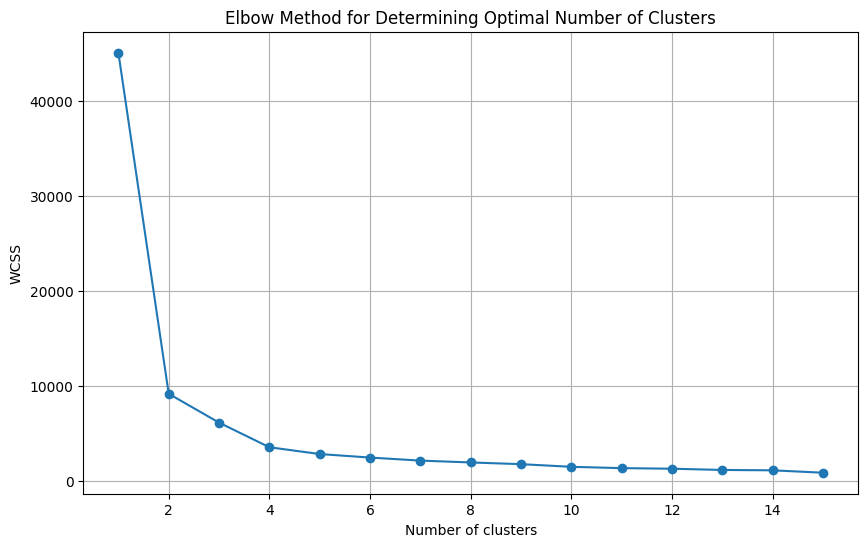

In [396]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
max_clusters = 15
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, init='random')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [397]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='random')
kmeanspp = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
kmeans.fit(X)
kmeanspp.fit(X)

KMeans(n_clusters=4, random_state=42)

In [398]:
km_lb = kmeans.labels_
kmpp_lb = kmeanspp.labels_

In [399]:
df['fluoride_level']

0       0
1       0
2       0
3       2
4       0
       ..
1054    0
1055    0
1056    0
1057    0
1058    2
Name: fluoride_level, Length: 1059, dtype: int64

In [400]:
km_pur_df = pd.crosstab(df['fluoride_level'], km_lb)
km_pur_df

col_0,0,1,2,3
fluoride_level,,,,
0,301,181,83,222
1,0,2,0,0
2,66,66,107,17
3,0,2,0,12


In [401]:
print('Purity of KMeans clustering: ', round(km_pur_df.max(axis=0).sum() / len(X['fluoride_level']), 4))

Purity of KMeans clustering:  0.7658


In [402]:
kmpp_pur_df = pd.crosstab(df['fluoride_level'], kmpp_lb)
kmpp_pur_df

col_0,0,1,2,3
fluoride_level,,,,
0,301,231,172,83
1,0,2,0,0
2,66,39,44,107
3,0,12,2,0


In [403]:
print('Purity of KMeans clustering: ', round(kmpp_pur_df.max(axis=0).sum() / len(X['fluoride_level']), 4))

Purity of KMeans clustering:  0.7658


The purity scores for both K-Means and K-Means++ clustering methods are the same at 0.7658. This indicates that, for this dataset and the chosen number of clusters (4), both K-Means and K-Means++ produce equivalent clustering quality in terms of purity. Furthermore, both clustering methods show that: 
- **Fluoride Level 0** is the most prevalent and is spread across all clusters.
- **Fluoride Level 1** is very rare, appearing only in Cluster 1.
- **Fluoride Level 2** is more evenly distributed in K-Means++ compared to K-Means.
- **Fluoride Level 3** has more occurrences in K-Means++ Clustering.